# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  Comparing the total number of 568 cities geolocations obtained from OpenWeather.com, there are 391 cities from the Northern Hemisphere that have weather information while there are 177 cities from the Southern Hemisphere.
2.  From the image of "Latitude vs. Max Temperature", it shows cities located around the equator have relative higher max temperatures than cities located around the North Pole and the South Pole. The cities that have the highest max temperature above 100F are located 20 to 40 degree latitude north to the equator. 
3.  The aggregated data for all 568 citites shows there is a very weak coorelation between latitude and the other three selected factors including humidity, cloudiness and wind speed. Plots did not show a proven trend contributing to weather change or impact by city locations as they approach closer to the equator. 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [7]:
cities

['olafsvik',
 'botngard',
 'yellowknife',
 'upernavik',
 'barrow',
 'new norfolk',
 'mayna',
 'rikitea',
 'ribeira grande',
 'bluff',
 'chuy',
 'north bend',
 'klaksvik',
 'te anau',
 'sao joao da barra',
 'castro',
 'pevek',
 'kodiak',
 'bengkulu',
 'punta arenas',
 'forestville',
 'avarua',
 'navalcarnero',
 'bacong',
 'buta',
 'puerto ayora',
 'kuche',
 'inuvik',
 'lujan',
 'salina',
 'bundaberg',
 'kudahuvadhoo',
 'port keats',
 'saleaula',
 'butaritari',
 'ushuaia',
 'albany',
 'jamestown',
 'colesberg',
 'buraydah',
 'atuona',
 'souillac',
 'mataura',
 'mehamn',
 'lata',
 'cape town',
 'mar del plata',
 'severo-kurilsk',
 'hobart',
 'arraial do cabo',
 'nikolskoye',
 'saint-philippe',
 'vaini',
 'muravlenko',
 'osoyoos',
 'khatanga',
 'nanortalik',
 'byron bay',
 'faanui',
 'strezhevoy',
 'stykkisholmur',
 'belushya guba',
 'gazli',
 'mitsamiouli',
 'college',
 'salalah',
 'zhigansk',
 'bajil',
 'bolungarvik',
 'sura',
 'bilibino',
 'hilo',
 'lima',
 'zyryanka',
 'juye',
 'talnak

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#set up API URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
query_url

In [ ]:
#holds all my response
data = []

#counter
i = 1 

# loop through each city name in city list
for city in cities:
    
    #obtain api results
    response = requests.get(query_url + city).json()
    
    #wait 1 second to prevent api usage violation (60 requests/min)
    time.sleep(1)
    
    try:
        #Longitude and latitude
        latitude = response['coord']['lat'] #coord does not work?
        
        longitude = response['coord']['lon']

        #humidity
        humidity = response['main']['humidity']

        #cloudiness
        cloudiness = response['clouds']['all']

        #windspeed
        windspeed = response['wind']['speed']

        #temperature
        temperature_max = response['main']['temp_max']

        #print((latitude,longitude))

        data.append({'city':city,
                    'latitude': latitude,
                    'longitude': longitude,
                    'humidity': humidity,
                    'cloudiness': cloudiness,
                    'windspeed': windspeed,
                    'temperature': temperature_max})
        print("---------")
        print(f"{city} was found")
        i=i+1
    except:
        print("----------")
        print(f"{city} is not found")
        i=i+1
    
    data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#create a dataframe to store data received from API
df_citygeo = pd.DataFrame(data)
df_citygeo

NameError: name 'data' is not defined

In [ ]:
# reformat the column name
df_citygeo.columns = ['City','Latitude','Longitude','Humidity','Cloudiness', 'Windspeed', 'Temperature_Max']
df_citygeo

In [ ]:
#print dataframe to a local data file
df_citygeo.to_csv('../output_data/cities_geo_final2.csv',index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.

In [9]:
# import dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [10]:
#import local data file to create dataframe
df_citygeo = pd.read_csv('../output_data/cities_geo_final2.csv')
df_citygeo

,City,Latitude,Longitude,Humidity,Cloudiness,Windspeed,Temperature_Max
0,castro,-24.7911,-50.0119,40,40,5.88,74.64
1,mulege,26.8833,-111.9833,39,100,0.65,93.63
2,kirksville,40.1948,-92.5833,58,97,4.00,83.57
3,puntarenas,9.9763,-84.8384,94,100,7.85,75.92
4,lebu,-37.6167,-73.6500,97,100,10.71,54.10
...,...,...,...,...,...,...,...
563,cheremukhovo,60.3484,59.9851,60,55,4.38,57.02
564,kaseda,31.4167,130.3167,81,1,9.57,76.33
565,mae sai,20.4335,99.8762,97,100,1.45,74.01
566,mayumba,-3.4320,10.6554,78,88,9.31,72.28


In [11]:
#count no. of records in the dataframe
df_citygeo.count()

City               568
Latitude           568
Longitude          568
Humidity           568
Cloudiness         568
Windspeed          568
Temperature_Max    568
dtype: int64

In [12]:
#check the dataframe header (#)
df_citygeo.head()

,City,Latitude,Longitude,Humidity,Cloudiness,Windspeed,Temperature_Max
0,castro,-24.7911,-50.0119,40,40,5.88,74.64
1,mulege,26.8833,-111.9833,39,100,0.65,93.63
2,kirksville,40.1948,-92.5833,58,97,4.00,83.57
3,puntarenas,9.9763,-84.8384,94,100,7.85,75.92
4,lebu,-37.6167,-73.6500,97,100,10.71,54.10


In [13]:
#Check the datatype in the dataframe
df_citygeo.dtypes

City                object
Latitude           float64
Longitude          float64
Humidity             int64
Cloudiness           int64
Windspeed          float64
Temperature_Max    float64
dtype: object

In [14]:
#Check the data measurements in the dataframe
#Check the max value in the Humidity column
description = df_citygeo.describe()
description

,Latitude,Longitude,Humidity,Cloudiness,Windspeed,Temperature_Max
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,19.525798,18.679979,66.926056,59.968310,7.652535,71.990018
std,32.836423,89.537107,23.359505,37.587462,5.196635,15.286003
min,-54.800000,-179.166700,1.000000,0.000000,0.110000,28.870000
25%,-7.610075,-60.912775,53.000000,25.750000,3.932500,61.165000
50%,22.180350,22.820450,73.000000,68.500000,6.520000,74.310000
75%,46.580975,97.712525,85.000000,99.000000,10.265000,82.035000
max,78.218600,179.316700,100.000000,100.000000,34.490000,110.050000


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "citygeo_clean".
df_citygeo_clean = df_citygeo.loc[(df_citygeo['Humidity'] <= 100)]
df_citygeo_clean

,City,Latitude,Longitude,Humidity,Cloudiness,Windspeed,Temperature_Max
0,castro,-24.7911,-50.0119,40,40,5.88,74.64
1,mulege,26.8833,-111.9833,39,100,0.65,93.63
2,kirksville,40.1948,-92.5833,58,97,4.00,83.57
3,puntarenas,9.9763,-84.8384,94,100,7.85,75.92
4,lebu,-37.6167,-73.6500,97,100,10.71,54.10
...,...,...,...,...,...,...,...
563,cheremukhovo,60.3484,59.9851,60,55,4.38,57.02
564,kaseda,31.4167,130.3167,81,1,9.57,76.33
565,mae sai,20.4335,99.8762,97,100,1.45,74.01
566,mayumba,-3.4320,10.6554,78,88,9.31,72.28


In [16]:
#create dataframe for humidity data and print to a local file (#)
df_humidity = df_citygeo_clean.loc[:,["City","Latitude","Longitude","Humidity"]]
df_humidity

,City,Latitude,Longitude,Humidity
0,castro,-24.7911,-50.0119,40
1,mulege,26.8833,-111.9833,39
2,kirksville,40.1948,-92.5833,58
3,puntarenas,9.9763,-84.8384,94
4,lebu,-37.6167,-73.6500,97
...,...,...,...,...
563,cheremukhovo,60.3484,59.9851,60
564,kaseda,31.4167,130.3167,81
565,mae sai,20.4335,99.8762,97
566,mayumba,-3.4320,10.6554,78


In [17]:
#print the hudity dataframe table to a local cvs file (#)
df_humidity.to_csv('../output_data/citygeo_humidity2.csv',index = False)

In [18]:
#create dataframe for cloudiness data and print to a local file (#)
df_cloudiness = df_citygeo_clean.loc[:,["City","Latitude","Longitude","Cloudiness"]]
df_cloudiness.to_csv('../output_data/citygeo_cloudiness2.csv',index = False)

In [19]:
#create dataframe for windspeed data and print to a local file (#)
df_windspeed = df_citygeo_clean.loc[:,["City","Latitude","Longitude","Windspeed"]]
df_windspeed.to_csv('../output_data/citygeo_windspeed2.csv',index = False)

In [20]:
#create dataframe for temperature data and print to a local file (#)
df_temperature = df_citygeo_clean.loc[:,["City","Latitude","Longitude","Temperature_Max"]]
df_temperature.to_csv('../output_data/citygeo_temperature2.csv',index = False)

In [21]:
#use iloc to create a dataframe (#)
df_citygeo_clean.iloc[:,]

,City,Latitude,Longitude,Humidity,Cloudiness,Windspeed,Temperature_Max
0,castro,-24.7911,-50.0119,40,40,5.88,74.64
1,mulege,26.8833,-111.9833,39,100,0.65,93.63
2,kirksville,40.1948,-92.5833,58,97,4.00,83.57
3,puntarenas,9.9763,-84.8384,94,100,7.85,75.92
4,lebu,-37.6167,-73.6500,97,100,10.71,54.10
...,...,...,...,...,...,...,...
563,cheremukhovo,60.3484,59.9851,60,55,4.38,57.02
564,kaseda,31.4167,130.3167,81,1,9.57,76.33
565,mae sai,20.4335,99.8762,97,100,1.45,74.01
566,mayumba,-3.4320,10.6554,78,88,9.31,72.28


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

In [22]:
#import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


In [23]:
# import csv file
df_citygeo = pd.read_csv('../output_data/cities_geo_final2.csv')
df_citygeo

,City,Latitude,Longitude,Humidity,Cloudiness,Windspeed,Temperature_Max
0,castro,-24.7911,-50.0119,40,40,5.88,74.64
1,mulege,26.8833,-111.9833,39,100,0.65,93.63
2,kirksville,40.1948,-92.5833,58,97,4.00,83.57
3,puntarenas,9.9763,-84.8384,94,100,7.85,75.92
4,lebu,-37.6167,-73.6500,97,100,10.71,54.10
...,...,...,...,...,...,...,...
563,cheremukhovo,60.3484,59.9851,60,55,4.38,57.02
564,kaseda,31.4167,130.3167,81,1,9.57,76.33
565,mae sai,20.4335,99.8762,97,100,1.45,74.01
566,mayumba,-3.4320,10.6554,78,88,9.31,72.28


In [24]:
# convert variables to generate a list 
latitude = df_citygeo.iloc[:,1].tolist()
humidity = df_citygeo.iloc[:,3].tolist()
cloudiness = df_citygeo.iloc[:,4].tolist()
windspeed = df_citygeo.iloc[:,5].tolist()
temp = df_citygeo.iloc[:,6].tolist()
# print("Latitude",latitude)
# print("humidity",humidity)
# print("Cloudiness",cloudiness)
# print("Windspeed",windspeed)
# print("temperature",temp)

In [25]:
# Obtain basic overall data information 
description = df_citygeo.describe()
description

,Latitude,Longitude,Humidity,Cloudiness,Windspeed,Temperature_Max
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,19.525798,18.679979,66.926056,59.968310,7.652535,71.990018
std,32.836423,89.537107,23.359505,37.587462,5.196635,15.286003
min,-54.800000,-179.166700,1.000000,0.000000,0.110000,28.870000
25%,-7.610075,-60.912775,53.000000,25.750000,3.932500,61.165000
50%,22.180350,22.820450,73.000000,68.500000,6.520000,74.310000
75%,46.580975,97.712525,85.000000,99.000000,10.265000,82.035000
max,78.218600,179.316700,100.000000,100.000000,34.490000,110.050000


## Latitude vs. Temperature Plot

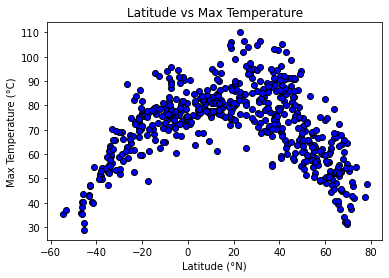

In [26]:
# create scatter plot and add titles 
plt.scatter(latitude, temp, marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Latitude vs Max Temperature")
plt.xlabel("Latitude (°N)")
plt.ylabel("Max Temperature (°C)")

#Save an image of the chart and print to screen
plt.savefig("../Images/temperature.png")
plt.show()

## Latitude vs. Humidity Plot

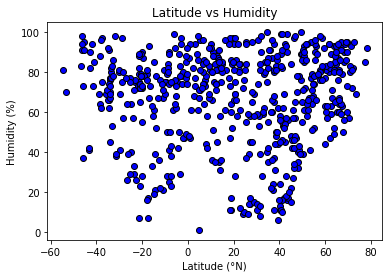

In [27]:
# create scatter plot and add titles 
plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude (°N)")
plt.ylabel("Humidity (%)")

#Save an image of the chart and print to screen
plt.savefig("../Images/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

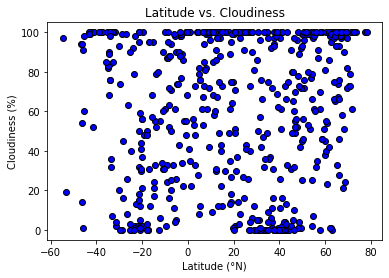

In [28]:
# create scatter plot and add titles 
plt.scatter(latitude, cloudiness, marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude (°N)")
plt.ylabel("Cloudiness (%)")

#Save an image of the chart and print to screen
plt.savefig("../Images/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

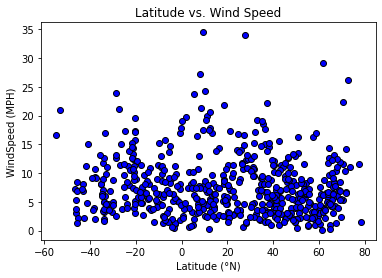

In [29]:
# create scatter plot and add titles 
plt.scatter(latitude, windspeed, marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude (°N)")
plt.ylabel("WindSpeed (MPH)")

#Save an image of the chart and print to screen
plt.savefig("../Images/windspeed.png")
plt.show()

## Linear Regression

In [30]:
#import dependencies - run if started from here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# import csv file - run if started from here
df_citygeo = pd.read_csv('../output_data/cities_geo_final2.csv')
df_citygeo

,City,Latitude,Longitude,Humidity,Cloudiness,Windspeed,Temperature_Max
0,castro,-24.7911,-50.0119,40,40,5.88,74.64
1,mulege,26.8833,-111.9833,39,100,0.65,93.63
2,kirksville,40.1948,-92.5833,58,97,4.00,83.57
3,puntarenas,9.9763,-84.8384,94,100,7.85,75.92
4,lebu,-37.6167,-73.6500,97,100,10.71,54.10
...,...,...,...,...,...,...,...
563,cheremukhovo,60.3484,59.9851,60,55,4.38,57.02
564,kaseda,31.4167,130.3167,81,1,9.57,76.33
565,mae sai,20.4335,99.8762,97,100,1.45,74.01
566,mayumba,-3.4320,10.6554,78,88,9.31,72.28


In [31]:
#create dataframe for Northern Hemisphere (0 < latitude <90 )
df_citygeo_northhemi = df_citygeo.loc[(df_citygeo['Latitude'] > 0) & (df_citygeo['Latitude'] <= 100)]
df_citygeo_northhemi

#print to a local file (#)
df_citygeo_northhemi.to_csv('../output_data/citygeo_citygeo_northhemi.csv',index = False)

In [32]:
#Obtain description of Northern Hemisphere dataframe
description_nh = df_citygeo_northhemi.describe()
description_nh

,Latitude,Longitude,Humidity,Cloudiness,Windspeed,Temperature_Max
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,37.858735,14.695118,66.969309,60.856777,7.521100,73.834578
std,20.130034,87.996381,24.093708,37.972999,5.444402,15.498677
min,0.354600,-179.166700,1.000000,0.000000,0.110000,31.390000
25%,20.391750,-67.750900,53.000000,27.000000,3.625000,62.705000
50%,39.150200,21.548200,73.000000,72.000000,6.260000,76.350000
75%,54.341200,91.906100,86.000000,100.000000,10.010000,84.640000
max,78.218600,179.316700,100.000000,100.000000,34.490000,110.050000


In [33]:
#create dataframe for Southern Hemisphere (= -90 < latitude < 0 )
df_citygeo_southhemi = df_citygeo.loc[(df_citygeo['Latitude'] < 0) & (df_citygeo['Latitude'] >= -100)]
df_citygeo_southhemi

#print to a local file (#)
df_citygeo_southhemi.to_csv('../output_data/citygeo_citygeo_southhemi.csv',index = False)

In [34]:
#Obtain description of Southern Hemisphere dataframe
description_sh = df_citygeo_southhemi.describe()
description_sh

,Latitude,Longitude,Humidity,Cloudiness,Windspeed,Temperature_Max
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,-20.972383,27.482695,66.830508,58.005650,7.942881,67.915311
std,13.401520,92.495176,21.715217,36.751391,4.603590,14.008048
min,-54.800000,-175.200000,7.000000,0.000000,0.430000,28.870000
25%,-32.816700,-55.733300,55.000000,24.000000,4.630000,59.140000
50%,-20.408100,23.433300,74.000000,61.000000,7.140000,70.920000
75%,-8.836800,119.897800,81.000000,95.000000,10.780000,77.040000
max,-0.216700,175.515300,99.000000,100.000000,23.940000,95.610000


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [35]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [36]:
# Northern Hemisphere - convert variables to generate a list 
latitude_nh = df_citygeo_northhemi.iloc[:,1]
humidity_nh = df_citygeo_northhemi.iloc[:,3]
cloudiness_nh = df_citygeo_northhemi.iloc[:,4]
windspeed_nh = df_citygeo_northhemi.iloc[:,5]
tempmax_nh = df_citygeo_northhemi.iloc[:,6]

In [37]:
#Perform a linear regression on latitude versus Max Temperature rate - Northern Hemisphere
tempmax_slope, tempmax_int, tempmax_r, tempmax_p, tempmax_std_err = stats.linregress(latitude_nh, tempmax_nh)

In [38]:
# Create equation of line to calculate predicted rate - max temperature
tempmax_fit = tempmax_slope * latitude_nh + tempmax_int
# print(tempmax_fit)

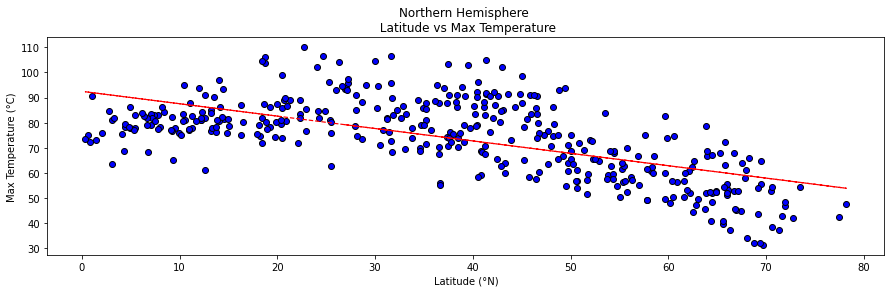

<Figure size 432x288 with 0 Axes>

In [39]:
# Plot the linear model on top of scatter plot 
latitude_nh = df_citygeo_northhemi.iloc[:,1]
tempmax_nh = df_citygeo_northhemi.iloc[:,6]
plt.figure(figsize=(15,4))
plt.scatter(latitude_nh,tempmax_nh, marker="o", facecolors="blue", edgecolors="black")
plt.plot(latitude_nh,tempmax_fit,"--", linewidth = 1.2, color = "red")

#annotate
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude_nh, tempmax_nh)
regress_values = latitude_nh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# plt.xticks(latitude_nh, rotation=90)
plt.title("Northern Hemisphere \n Latitude vs Max Temperature")
plt.xlabel("Latitude (°N)")
plt.ylabel("Max Temperature (°C)")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()

#Save an image of the chart and print to screen
plt.savefig("../Images/temperature-nh.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [40]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [41]:
# Southern Hemisphere - convert variables to generate a list
latitude_sh = df_citygeo_southhemi.iloc[:,1]
tempmax_sh = df_citygeo_southhemi.iloc[:,6]

In [42]:
#Perform a linear regression on latitude versus Max Temperature rate - Southern Hemisphere
tempmax_slope, tempmax_int, tempmax_r, tempmax_p, tempmax_std_err = stats.linregress(latitude_sh, tempmax_sh)

In [43]:
# Create equation of line to calculate predicted rate - max temperature
tempmax_fit = tempmax_slope * latitude_sh + tempmax_int


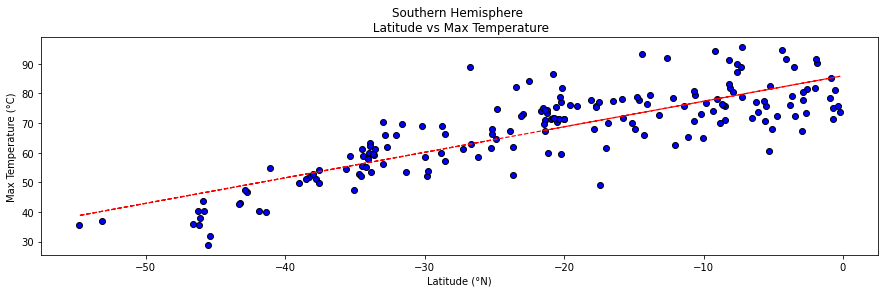

<Figure size 432x288 with 0 Axes>

In [44]:
# Plot the linear model on top of scatter plot 
latitude_sh = df_citygeo_southhemi.iloc[:,1]
tempmax_sh = df_citygeo_southhemi.iloc[:,6]
plt.figure(figsize=(15,4))
plt.scatter(latitude_sh,tempmax_sh, marker="o", facecolors="blue", edgecolors="black")
plt.plot(latitude_sh,tempmax_fit,"--", linewidth = 1.2, color = "red")
# plt.xticks(latitude_sh, rotation=90)
plt.title("Southern Hemisphere \n Latitude vs Max Temperature")
plt.xlabel("Latitude (°N)")
plt.ylabel("Max Temperature (°C)")
plt.show()

#Save an image of the chart and print to screen
plt.savefig("../Images/temperature-sh.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [45]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

# Northern Hemisphere - convert variables to generate a list 
latitude_nh = df_citygeo_northhemi.iloc[:,1]
humidity_nh = df_citygeo_northhemi.iloc[:,3]
cloudiness_nh = df_citygeo_northhemi.iloc[:,4]
windspeed_nh = df_citygeo_northhemi.iloc[:,5]
tempmax_nh = df_citygeo_northhemi.iloc[:,6]

#Perform a linear regression on latitude versus Humidity rate - Northern Hemisphere
h_slope, h_int, h_r, h_p, h_std_err = stats.linregress(latitude_nh, humidity_nh)

# Create equation of line to calculate predicted rate - max temperature
h_fit = h_slope * latitude_nh + h_int


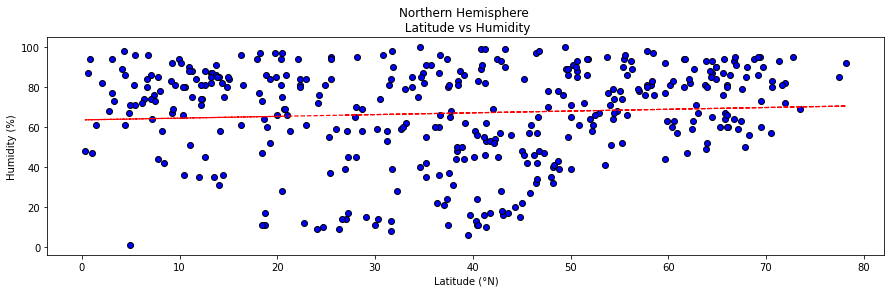

<Figure size 432x288 with 0 Axes>

In [46]:
# Plot the linear model on top of scatter plot 
plt.figure(figsize=(15,4))
plt.scatter(latitude_nh,humidity_nh, marker="o", facecolors="blue", edgecolors="black")
plt.plot(latitude_nh,h_fit,"--", linewidth = 1.2, color = "red")
# plt.xticks(latitude_nh, rotation=90)
plt.title("Northern Hemisphere \n Latitude vs Humidity")
plt.xlabel("Latitude (°N)")
plt.ylabel("Humidity (%)")
plt.show()

#Save an image of the chart and print to screen
plt.savefig("../Images/humidity-nh.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [47]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

# Southern Hemisphere - convert variables to generate a list
latitude_sh = df_citygeo_southhemi.iloc[:,1]
humidity_sh = df_citygeo_southhemi.iloc[:,3]
cloudiness_sh = df_citygeo_southhemi.iloc[:,4]
windspeed_sh = df_citygeo_southhemi.iloc[:,5]
tempmax_sh = df_citygeo_southhemi.iloc[:,6]

#Perform a linear regression on latitude versus Max Temperature rate - Southern Hemisphere
h_slope, h_int, h_r, h_p, h_std_err = stats.linregress(latitude_sh, humidity_sh)

# Create equation of line to calculate predicted rate - max temperature
h_fit = h_slope * latitude_sh + h_int

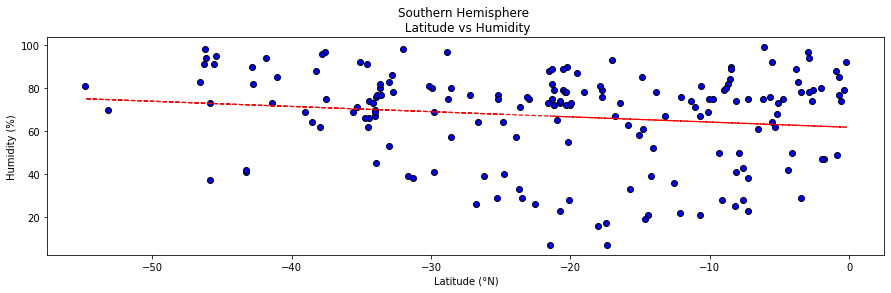

<Figure size 432x288 with 0 Axes>

In [48]:
# Plot the linear model on top of scatter plot 
latitude_sh = df_citygeo_southhemi.iloc[:,1]
tempmax_sh = df_citygeo_southhemi.iloc[:,6]
plt.figure(figsize=(15,4))
plt.scatter(latitude_sh,humidity_sh, marker="o", facecolors="blue", edgecolors="black")
plt.plot(latitude_sh,h_fit,"--", linewidth = 1.2, color = "red")
# plt.xticks(latitude_sh, rotation=90)
plt.title("Southern Hemisphere \n Latitude vs Humidity")
plt.xlabel("Latitude (°N)")
plt.ylabel("Humidity (%)")
plt.show()

#Save an image of the chart and print to screen
plt.savefig("../Images/humidity-sh.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [49]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

# Northern Hemisphere - convert variables to generate a list 
latitude_nh = df_citygeo_northhemi.iloc[:,1]
humidity_nh = df_citygeo_northhemi.iloc[:,3]
cloudiness_nh = df_citygeo_northhemi.iloc[:,4]
windspeed_nh = df_citygeo_northhemi.iloc[:,5]
tempmax_nh = df_citygeo_northhemi.iloc[:,6]

#Perform a linear regression on latitude versus Humidity rate - Northern Hemisphere
c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(latitude_nh, cloudiness_nh)

# Create equation of line to calculate predicted rate - max temperature
c_fit = c_slope * latitude_nh + c_int


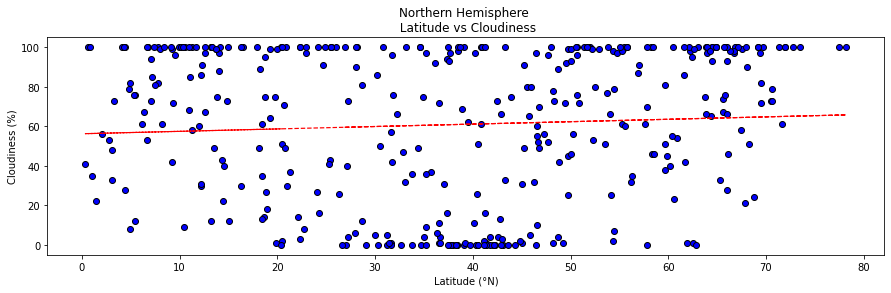

<Figure size 432x288 with 0 Axes>

In [50]:
# Plot the linear model on top of scatter plot 
plt.figure(figsize=(15,4))
plt.scatter(latitude_nh,cloudiness_nh, marker="o", facecolors="blue", edgecolors="black")
plt.plot(latitude_nh,c_fit,"--", linewidth = 1.2, color = "red")
# plt.xticks(latitude_nh, rotation=90)
plt.title("Northern Hemisphere \n Latitude vs Cloudiness")
plt.xlabel("Latitude (°N)")
plt.ylabel("Cloudiness (%)")
plt.show()

#Save an image of the chart and print to screen
plt.savefig("../Images/cloudiness-nh.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [51]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

# Southern Hemisphere - convert variables to generate a list
latitude_sh = df_citygeo_southhemi.iloc[:,1]
humidity_sh = df_citygeo_southhemi.iloc[:,3]
cloudiness_sh = df_citygeo_southhemi.iloc[:,4]
windspeed_sh = df_citygeo_southhemi.iloc[:,5]
tempmax_sh = df_citygeo_southhemi.iloc[:,6]

#Perform a linear regression on latitude versus Max Temperature rate - Southern Hemisphere
c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(latitude_sh, cloudiness_sh)

# Create equation of line to calculate predicted rate - max temperature
c_fit = c_slope * latitude_sh + c_int

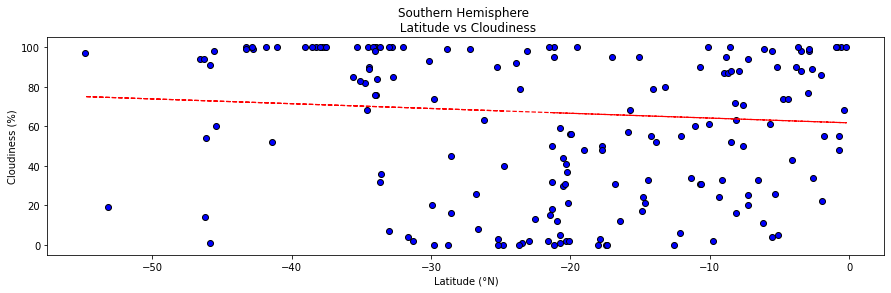

<Figure size 432x288 with 0 Axes>

In [52]:
# Plot the linear model on top of scatter plot 
latitude_sh = df_citygeo_southhemi.iloc[:,1]
tempmax_sh = df_citygeo_southhemi.iloc[:,6]
plt.figure(figsize=(15,4))
plt.scatter(latitude_sh,cloudiness_sh, marker="o", facecolors="blue", edgecolors="black")
plt.plot(latitude_sh,h_fit,"--", linewidth = 1.2, color = "red")
# plt.xticks(latitude_sh, rotation=90)
plt.title("Southern Hemisphere \n Latitude vs Cloudiness")
plt.xlabel("Latitude (°N)")
plt.ylabel("Cloudiness (%)")
plt.show()

#Save an image of the chart and print to screen
plt.savefig("../Images/cloudiness-sh.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [53]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

# Northern Hemisphere - convert variables to generate a list 
latitude_nh = df_citygeo_northhemi.iloc[:,1]
humidity_nh = df_citygeo_northhemi.iloc[:,3]
cloudiness_nh = df_citygeo_northhemi.iloc[:,4]
windspeed_nh = df_citygeo_northhemi.iloc[:,5]
tempmax_nh = df_citygeo_northhemi.iloc[:,6]

#Perform a linear regression on latitude versus Humidity rate - Northern Hemisphere
w_slope, w_int, w_r, w_p, w_std_err = stats.linregress(latitude_nh, windspeed_nh)

# Create equation of line to calculate predicted rate - max temperature
w_fit = w_slope * latitude_nh + w_int

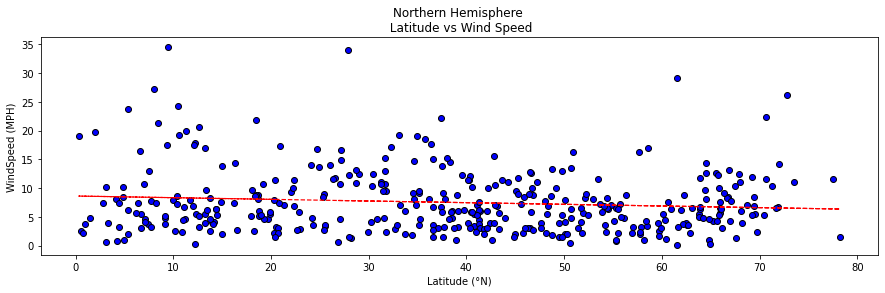

<Figure size 432x288 with 0 Axes>

In [54]:

# Plot the linear model on top of scatter plot 
plt.figure(figsize=(15,4))
plt.scatter(latitude_nh,windspeed_nh, marker="o", facecolors="blue", edgecolors="black")
plt.plot(latitude_nh,w_fit,"--", linewidth = 1.2, color = "red")
# plt.xticks(latitude_nh, rotation=90)
plt.title("Northern Hemisphere \n Latitude vs Wind Speed")
plt.xlabel("Latitude (°N)")
plt.ylabel("WindSpeed (MPH)")
plt.show()

#Save an image of the chart and print to screen
plt.savefig("../Images/windspeed-nh.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [55]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

# Southern Hemisphere - convert variables to generate a list
latitude_sh = df_citygeo_southhemi.iloc[:,1]
humidity_sh = df_citygeo_southhemi.iloc[:,3]
cloudiness_sh = df_citygeo_southhemi.iloc[:,4]
windspeed_sh = df_citygeo_southhemi.iloc[:,5]
tempmax_sh = df_citygeo_southhemi.iloc[:,6]

#Perform a linear regression on latitude versus Max Temperature rate - Southern Hemisphere
w_slope, w_int, w_r, w_p, w_std_err = stats.linregress(latitude_sh, windspeed_sh)

# Create equation of line to calculate predicted rate - max temperature
w_fit = w_slope * latitude_sh + w_int

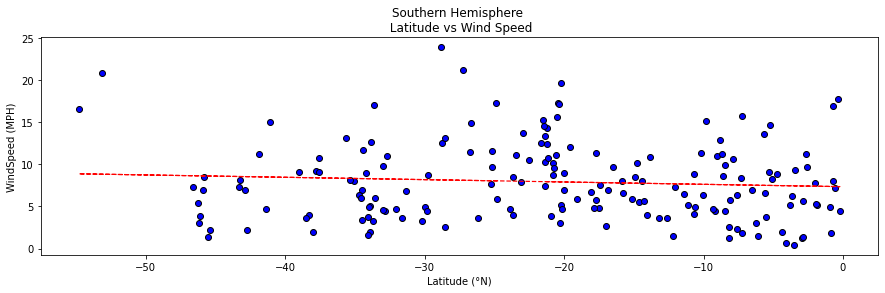

<Figure size 432x288 with 0 Axes>

In [56]:
# Plot the linear model on top of scatter plot 
latitude_sh = df_citygeo_southhemi.iloc[:,1]
tempmax_sh = df_citygeo_southhemi.iloc[:,6]
plt.figure(figsize=(15,4))
plt.scatter(latitude_sh,windspeed_sh, marker="o", facecolors="blue", edgecolors="black")
plt.plot(latitude_sh,w_fit,"--", linewidth = 1.2, color = "red")
# plt.xticks(latitude_sh, rotation=90)
plt.title("Southern Hemisphere \n Latitude vs Wind Speed")
plt.xlabel("Latitude (°N)")
plt.ylabel("WindSpeed (MPH)")
plt.show()

#Save an image of the chart and print to screen
plt.savefig("../Images/windspeed-sh.png")
plt.show()